In [22]:
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join as p_join
from os.path import split as p_split
from os.path import abspath
from pathlib import Path
TESTDIR = abspath('')
PROJDIR, folder = p_split(TESTDIR)

path_to_output = p_join(p_join(p_join(PROJDIR, "build"), "bin"), "output.csv")
path_to_data = p_join(TESTDIR, "output")
print("Test output:\t\t", path_to_data)
print("Terminal output:\t", path_to_output)

Test output:		 /home/theresa/ray/rayreworked/Tests/output
Terminal output:	 /home/theresa/ray/rayreworked/build/bin/output.csv


### output from TerminalApp

(200, 17) (200000, 17)
-2.456358896370498
1.8856669463846476
0.0
0.0026315183193629
-0.0039827128367254
0.9999886064899915
1.0
-2.6962606170806254 1.8856669463846476


,Index,Xloc,Yloc,Zloc,Weight,Xdir,Ydir,Zdir,Energy,Stokes0,Stokes1,Stokes2,Stokes3,pathLength,order,lastElement,extraParam
0,0,-2.456359,1.885667,0.0,1.0,0.002632,-0.003983,0.999989,100.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,12.0
1,1,-2.475298,1.849809,0.0,1.0,0.001850,-0.003991,0.999990,100.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,12.0
2,2,-2.494155,1.813902,0.0,1.0,0.001068,-0.004003,0.999991,100.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,12.0
3,3,-2.512932,1.777943,0.0,1.0,0.000285,-0.004019,0.999992,100.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,12.0
4,4,-2.531628,1.741934,0.0,1.0,-0.000497,-0.004039,0.999992,100.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,-2.233802,1.170371,0.0,1.0,-0.007315,0.005506,0.999958,100.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,12.0
196,196,-2.456359,1.885667,0.0,1.0,0.002632,-0.003983,0.999989,100.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,12.0
197,197,-2.475298,1.849809,0.0,1.0,0.001850,-0.003991,0.999990,100.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,12.0
198,198,-2.494155,1.813902,0.0,1.0,0.001068,-0.004003,0.999991,100.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,12.0


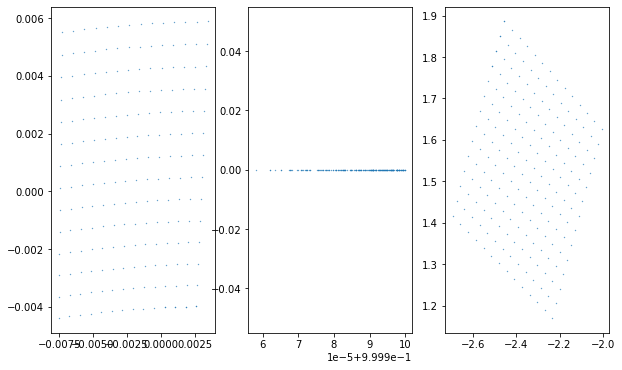

In [2]:
## test functions
data = pd.read_csv(path_to_output, sep=';',header=0)
#data = pd.read_csv(p_join(path_to_data,"testFile_randomUniform.csv"), sep=';',header=0)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
filtered = data[data['Weight']==1]
print(filtered.shape, data.shape,)
i = 0
print(filtered['Xloc'].values[i])
print(filtered['Yloc'].values[i])
print(filtered['Zloc'].values[i])

print(filtered['Xdir'].values[i])
print(filtered['Ydir'].values[i])
print(filtered['Zdir'].values[i])

print(filtered['Weight'].values[i])

print(min(filtered['Xloc']), (max(filtered['Yloc'])))
#print(np.unique(filtered['Weight'], return_counts=True)[:20])
#print(filtered['Weight'][:20])
#print(filtered['Energy'][:20])

s = 0.1
ax[0].scatter(filtered['Xdir'],filtered['Ydir'], s=s)
ax[1].scatter(filtered['Zdir'],filtered['Zloc'], s=s)
ax[2].scatter(filtered['Xloc'],filtered['Yloc'], s=s)
filtered

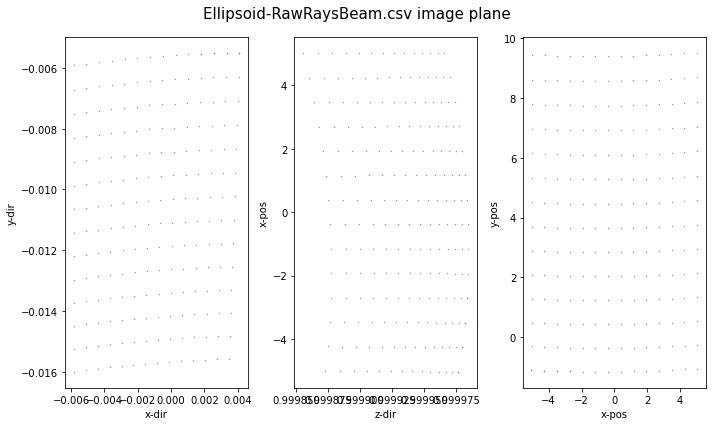

In [3]:
#load from file:
path = p_join(TESTDIR, "oldray_files")
file = "Ellipsoid-RawRaysBeam.csv"
minus_first_rzp2 = p_join(path, file)
#minus_first_rzp2 = p_join(minus_first_rzp2, "data")

rzp_minus_first_rzp2_path = minus_first_rzp2#p_join(minus_first_rzp2, 'imageplane_beam.csv')
rzp_minus_first_rzp2 = pd.read_csv(rzp_minus_first_rzp2_path, sep=';',header=0)

#ip_minus_first_rzp2_path = p_join(minus_first_rzp2, 'imageplane_beam.csv')
#ip_minus_first_rzp2 = pd.read_csv(ip_minus_first_rzp2_path, sep=';',header=0)

x = rzp_minus_first_rzp2[rzp_minus_first_rzp2.columns[6]].values.astype(float)
y = rzp_minus_first_rzp2[rzp_minus_first_rzp2.columns[7]].values.astype(float)
z = rzp_minus_first_rzp2[rzp_minus_first_rzp2.columns[8]].values.astype(float)


ox = rzp_minus_first_rzp2[rzp_minus_first_rzp2.columns[3]].values.astype(float)
oy = rzp_minus_first_rzp2[rzp_minus_first_rzp2.columns[4]].values.astype(float)
oz = rzp_minus_first_rzp2[rzp_minus_first_rzp2.columns[5]].values.astype(float)
#assert(np.all(oz == 385))

fig, ax = plt.subplots(1, 3, figsize=(10, 6))
fig.suptitle(file+" image plane", fontsize=15)
ax[0].scatter(x,y, s=0.1)
ax[0].set_xlabel('x-dir')
ax[0].set_ylabel('y-dir')
ax[1].scatter(z,ox, s=0.1)
ax[1].set_xlabel('z-dir')
ax[1].set_ylabel('x-pos')
ax[2].scatter(ox,oy, s=0.1)
ax[2].set_xlabel('x-pos')
ax[2].set_ylabel('y-pos')
fig.tight_layout()


### any output file from the test directionary

[1 2]
(20000,)


,Index,Xloc,Yloc,Zloc,Weight,Xdir,Ydir,Zdir,Energy,S0,S1,S2,S3,pathLength,order,lastElement,extraParam
0,0,-0.069151,-0.138466,0,1,0.005120,0.004835,0.999975,100,1,1,0,0,10999.999312,0,2,21
1,1,-0.068165,-0.137524,0,1,0.005047,0.004839,0.999976,100,1,1,0,0,10999.999322,0,2,21
2,2,-0.067178,-0.136595,0,1,0.004974,0.004842,0.999976,100,1,1,0,0,10999.999332,0,2,21
3,3,-0.066191,-0.135680,0,1,0.004901,0.004845,0.999976,100,1,1,0,0,10999.999341,0,2,21
4,4,-0.065205,-0.134779,0,1,0.004828,0.004848,0.999977,100,1,1,0,0,10999.999351,0,2,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,0.043484,-0.118384,0,1,-0.003219,0.004906,0.999983,100,1,1,0,0,10999.999522,0,2,21
19996,19996,0.044472,-0.118987,0,1,-0.003292,0.004903,0.999983,100,1,1,0,0,10999.999516,0,2,21
19997,19997,0.045460,-0.119603,0,1,-0.003365,0.004901,0.999982,100,1,1,0,0,10999.999509,0,2,21
19998,19998,0.046447,-0.120233,0,1,-0.003438,0.004899,0.999982,100,1,1,0,0,10999.999503,0,2,21


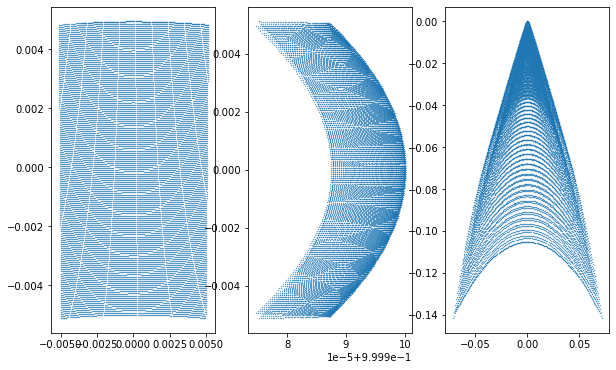

In [162]:
folder = p_join(TESTDIR, "output")
slit = p_join(folder, "testFile_slit.csv")
toroid = p_join(folder, "testFile_toroid.csv")

slit= pd.read_csv(slit, sep=';',header=0)
toroid= pd.read_csv(toroid, sep=';',header=0)

filtered = toroid[toroid['Weight']!=0]


print(np.unique(slit['Weight'].values))
x = filtered['Xdir'].values.astype(float)
y = filtered['Ydir'].values.astype(float)
z = filtered['Zdir'].values.astype(float)


ox = filtered['Xloc'].values.astype(float)
oy = filtered['Yloc'].values.astype(float)
oz = filtered['Zloc'].values.astype(float)
print(x.shape)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
ax[0].scatter(x,y, s=0.1)
ax[1].scatter(z,x, s=0.1)
ax[2].scatter(ox,oy, s=0.1)
filtered

# spec1-first_rzp4mm

## RZP

1        0
3        0
4        0
8        0
10       0
        ..
19992    0
19993    0
19997    0
19998    0
19999    0
Name: extraParam, Length: 10489, dtype: int64


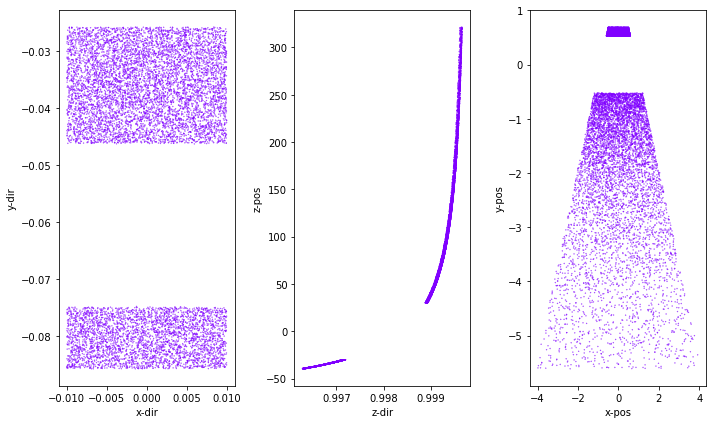

In [149]:
data_rzp = pd.read_csv(p_join(path_to_data,"testFile_spec1_first_rzp.csv"), sep=';',header=0)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
filtered = data_rzp[data_rzp['Weight']==2]
print(filtered.extraParam)

ax[0].scatter(filtered['Xdir'],filtered['Ydir'], c=filtered['Weight'], cmap='rainbow', s=0.1)
ax[0].set_xlabel('x-dir')
ax[0].set_ylabel('y-dir')
ax[1].scatter(filtered['Zdir'],filtered['Zloc'], c=filtered['Weight'], cmap='rainbow', s=0.1)
ax[1].set_xlabel('z-dir')
ax[1].set_ylabel('z-pos')
ax[2].scatter(filtered['Xloc'],filtered['Yloc'], c=filtered['Weight'], cmap='rainbow',s=0.1)
ax[2].set_xlabel('x-pos')
ax[2].set_ylabel('y-pos')
fig.tight_layout()

should look like this:
![](oldray_files/spec1-first_rzp4mm/rzp.png)

## Image Plane

14       1
74       1
154      1
194      1
241      1
        ..
19719    1
19899    1
19909    1
19976    1
19979    1
Name: extraParam, Length: 241, dtype: int64


<ipython-input-165-bc87c63b8e3c>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  assert(np.all(filtered[data_ip['Weight']!=0]['Zloc'].values == 0))


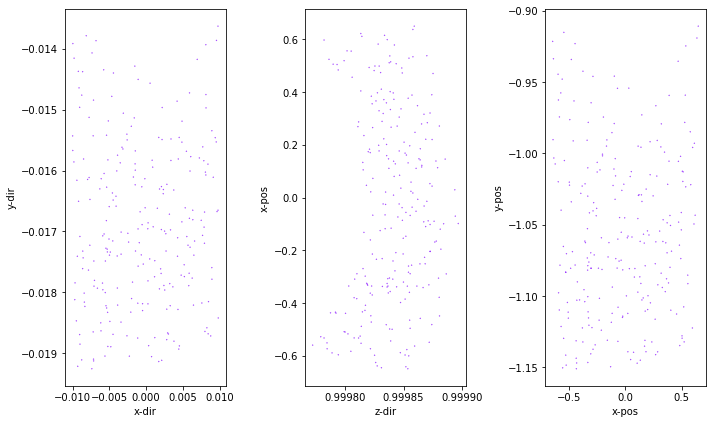

In [165]:
data_ip = pd.read_csv(p_join(path_to_data,"testFile_spec1_first_rzp_ip.csv"), sep=';',header=0)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
filtered = data_ip[data_ip['Weight']==0]

print(filtered.extraParam)
assert(np.all(filtered[data_ip['Weight']!=0]['Zloc'].values == 0))

ax[0].scatter(filtered['Xdir'],filtered['Ydir'], c=filtered['Weight'], cmap='rainbow', s=0.1)
ax[0].set_xlabel('x-dir')
ax[0].set_ylabel('y-dir')
ax[1].scatter(filtered['Zdir'],filtered['Xloc'], c=filtered['Weight'], cmap='rainbow', s=0.1)
ax[1].set_xlabel('z-dir')
ax[1].set_ylabel('x-pos')
ax[2].scatter(filtered['Xloc'],filtered['Yloc'], c=filtered['Weight'], cmap='rainbow', s=0.1)
ax[2].set_xlabel('x-pos')
ax[2].set_ylabel('y-pos')
fig.tight_layout()

should look like this:
![](oldray_files/spec1-first_rzp4mm/imageplane.png)

# spec1+first_rzp4mm

## RZP

(20000, 17)


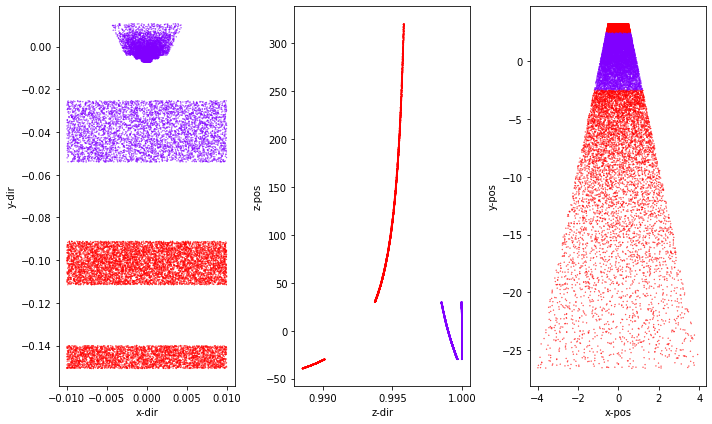

In [153]:
data_rzp = pd.read_csv(p_join(path_to_data,"testFile_spec1_first_plus_rzp.csv"), sep=';',header=0)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
filtered = data_rzp#[data_rzp['Weight']!=0]
print(filtered.shape)

ax[0].scatter(filtered['Xdir'],filtered['Ydir'], c=filtered['Weight'], cmap='rainbow', s=0.1)
ax[0].set_xlabel('x-dir')
ax[0].set_ylabel('y-dir')
ax[1].scatter(filtered['Zdir'],filtered['Zloc'], c=filtered['Weight'], cmap='rainbow', s=0.1)
ax[1].set_xlabel('z-dir')
ax[1].set_ylabel('z-pos')
ax[2].scatter(filtered['Xloc'],filtered['Yloc'], c=filtered['Weight'], cmap='rainbow', s=0.1)
ax[2].set_xlabel('x-pos')
ax[2].set_ylabel('y-pos')
fig.tight_layout()

should look like this:
![](oldray_files/spec1+first_rzp4mm/rzp.png)

![](output/spec1+first_rzp4mm/rzp.png)

## IMAGE PLANE

(20000, 17)


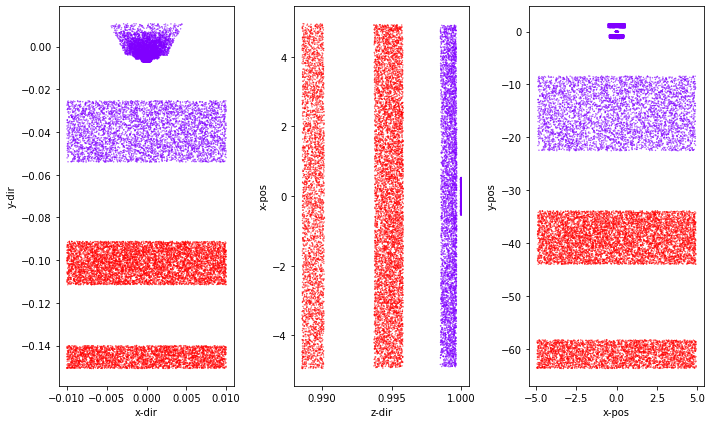

In [154]:
data_rzp = pd.read_csv(p_join(path_to_data,"testFile_spec1_first_plus_rzp_ip.csv"), sep=';',header=0)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
filtered = data_rzp#[data_rzp['Weight']!=0]

print(filtered.shape)
assert(np.all(filtered[filtered['Weight']==1]['Zloc'].values == 0))

ax[0].scatter(filtered['Xdir'],filtered['Ydir'], c=filtered['Weight'], cmap='rainbow', s=0.1)
ax[0].set_xlabel('x-dir')
ax[0].set_ylabel('y-dir')
ax[1].scatter(filtered['Zdir'],filtered['Xloc'], c=filtered['Weight'], cmap='rainbow', s=0.1)
ax[1].set_xlabel('z-dir')
ax[1].set_ylabel('x-pos')
ax[2].scatter(filtered['Xloc'],filtered['Yloc'], c=filtered['Weight'], cmap='rainbow', s=0.1)
ax[2].set_xlabel('x-pos')
ax[2].set_ylabel('y-pos')
fig.tight_layout()

should look like this:
![](oldray_files/spec1+first_rzp4mm/imageplane.png)

# spec1-first_rzp02

## rzp only

(19802, 17)


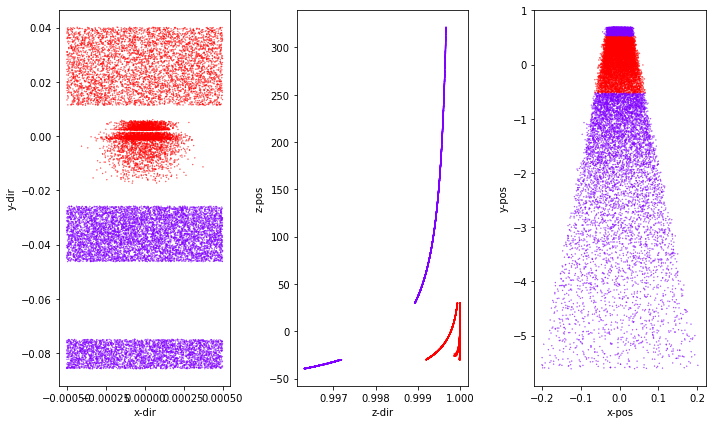

In [158]:
data_rzp = pd.read_csv(p_join(path_to_data,"testFile_spec1_first_minus_rzp2.csv"), sep=';',header=0)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
filtered = data_rzp[data_rzp['Weight']!=0]
print(filtered.shape)

ax[0].scatter(filtered['Xdir'],filtered['Ydir'], c=filtered['lastElement'], cmap='rainbow', s=0.1)
ax[0].set_xlabel('x-dir')
ax[0].set_ylabel('y-dir')
ax[1].scatter(filtered['Zdir'],filtered['Zloc'], c=filtered['lastElement'], cmap='rainbow', s=0.1)
ax[1].set_xlabel('z-dir')
ax[1].set_ylabel('z-pos')
ax[2].scatter(filtered['Xloc'],filtered['Yloc'], c=filtered['lastElement'], cmap='rainbow', s=0.1)
ax[2].set_xlabel('x-pos')
ax[2].set_ylabel('y-pos')
fig.tight_layout()

should look like this:
![](oldray_files/spec1-first_rzp02/rzp.png)

## image plane

(19790, 17)


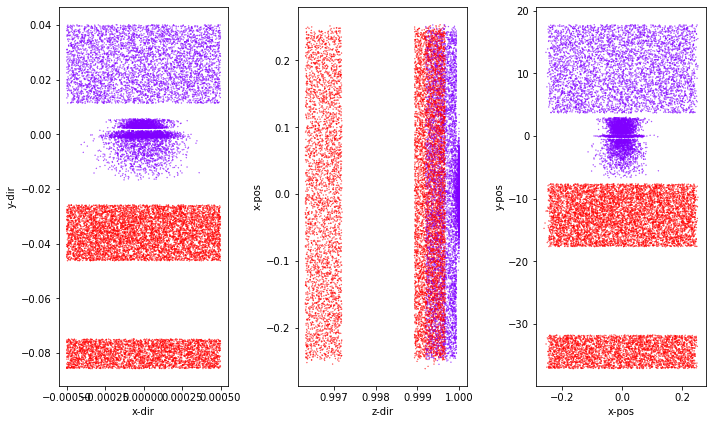

In [159]:
data_rzp = pd.read_csv(p_join(path_to_data,"testFile_spec1_first_minus_rzp_ip2.csv"), sep=';',header=0)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
filtered = data_rzp[data_rzp['Weight']!=0]
print(filtered.shape)
assert(np.all(filtered[filtered['Weight']!=0]['Zloc'].values == 0))

ax[0].scatter(filtered['Xdir'],filtered['Ydir'], c=filtered['Weight'], cmap='rainbow', s=0.1)
ax[0].set_xlabel('x-dir')
ax[0].set_ylabel('y-dir')
ax[1].scatter(filtered['Zdir'],filtered['Xloc'], c=filtered['Weight'], cmap='rainbow', s=0.1)
ax[1].set_xlabel('z-dir')
ax[1].set_ylabel('x-pos')
ax[2].scatter(filtered['Xloc'],filtered['Yloc'], c=filtered['Weight'], cmap='rainbow', s=0.1)
ax[2].set_xlabel('x-pos')
ax[2].set_ylabel('y-pos')
fig.tight_layout()

should look like this:
![](oldray_files/spec1-first_rzp02/imageplane.png)